# (a) Dynamic Programming Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = np.arange(-4,5) #states
#print(S)
U = np.arange(-2,3) #control actions
#print(U)

In [3]:
def Optimalfunction1():
    J = [] #List of list for cost at each [stage][state]
    MU = [] # Control action at each [stage][state]
    for i in range(0,16):
        V=[] 
        mu=[]
        if(i == 0):
            for j in range(0,S.size):
                if(S[j]==0):
                    V.append(0) #as Gn(15) = 0 if Xn = 0
                else:
                    V.append(float('inf')) # as Gn(15) = infinity if Xn != 0
        else:
            for j in range(0,S.size):
                jt = float('inf') 
                c = -4 
                for k in range(0,U.size): #iterating over control actions
                    xn = S[j]+U[k] #next state based on current state and action
                    if(xn<5 and xn>-5): 
                        j1 = J[-1][xn+4]+(S[j]+4)*(S[j]+4)+U[k]*U[k] 
                        if(j1<jt):
                            c = U[k]
                            jt = j1
                V.append(jt) # list of cost for each state in the stage 
                mu.append(c) #list of control for each state in the stage
        J.append(V) #2d list of cost[at each stage][for each state] 
        #print("i = %d" % i)
        #print("J:", J)
        if(i!=0):
            MU.append(mu)
    return J,MU

In [17]:
J,MU = Optimalfunction1()
print("The minimum costs at stage 0: " ,J[-1])
print("Best state to start with at stage 0: ", min(J[-1]))
print("set of control actions for stage 0: ", MU[-1])

The minimum costs at stage 0:  [11, 13, 18, 26, 38, 55, 78, 108, 146]
Best state to start with at stage 0:  11
set of control actions for stage 0:  [0, -1, -1, -2, -2, -2, -2, -2, -2]


# (b) Cost-to-go for x4 = 4

In [19]:
# Cost to go for x_4 = 4
#print(len(J))
print("cost to go for x_4 = 4: ", J[-4][-1])

cost to go for x_4 = 4:  146


# (c) Plots for x0 = {0,1,-4}

In [27]:
def optimalpath(x,MU):
    NU=[] #first stage
    T=[]
    NU.append(x)
    for i in range(0,15):
        #print(NU)
        T.append(MU[14-i][x+4])
        x = x+MU[14-i][x+4]
        NU.append(x)
    return NU,T

Associated Optimal cost for x_0 = 0:  38
Associated Optimal cost for x_0 = 1:  55
Associated Optimal cost for x_0 = -4:  11


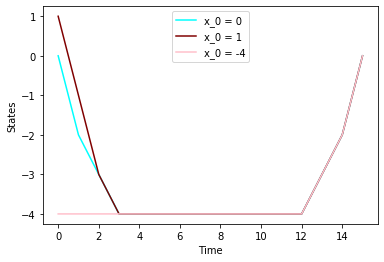

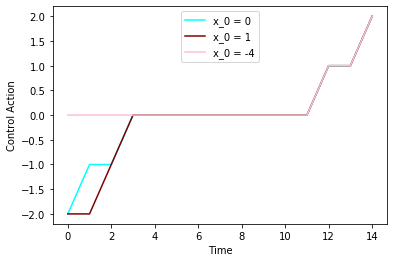

In [56]:
J,MU = Optimalfunction1()
t = np.arange(0,16)
plt.figure(1)
plt.xlabel("Time")
plt.ylabel("States")
plt.plot(t, optimalpath(0,MU)[0], 'aqua',label = "x_0 = 0")
plt.plot(t, optimalpath(1,MU)[0], 'maroon',label = "x_0 = 1")
plt.plot(t, optimalpath(-4,MU)[0], 'pink',label = "x_0 = -4")
plt.legend(loc="upper center")
t = np.arange(0,15)
plt.figure(2)
plt.xlabel("Time")
plt.ylabel("Control Action")
plt.plot(t, optimalpath(0,MU)[1], 'aqua',label = "x_0 = 0")
plt.plot(t, optimalpath(1,MU)[1], 'maroon',label = "x_0 = 1")
plt.plot(t, optimalpath(-4,MU)[1], 'pink',label = "x_0 = -4")
plt.legend(loc="upper center")

print("Associated Optimal cost for x_0 = 0: ", J[-1][4])
print("Associated Optimal cost for x_0 = 1: ", J[-1][5])
print("Associated Optimal cost for x_0 = -4: ", J[-1][0])

# (d) DP when all the terminal costs are 0

In [59]:
def Optimalfunction3():
    J = [] #List of list for cost at each [stage][state]
    MU = [] # Control action at each [stage][state]
    for i in range(0,16):
        V=[] 
        mu=[]
        if(i == 0):
            for j in range(0,S.size):
                #if(S[j]==0):
                V.append(0) #as Gn(15) = 0 if Xn = 0
                #else:
                    #V.append(float('inf')) # as Gn(15) = infinity if Xn != 0
        else:
            for j in range(0,S.size):
                jt = float('inf') 
                c = -4 
                for k in range(0,U.size): #iterating over control actions
                    xn = S[j]+U[k] #next state based on current state and action
                    if(xn<5 and xn>-5): 
                        j1 = J[-1][xn+4]+(S[j]+4)*(S[j]+4)+U[k]*U[k] 
                        if(j1<jt):
                            c = U[k]
                            jt = j1
                V.append(jt) # list of cost for each state in the stage 
                mu.append(c) #list of control for each state in the stage
        J.append(V) #2d list of cost[at each stage][for each state] 
        #print("i = %d" % i)
        #print("J:", J)
        if(i!=0):
            MU.append(mu)
    return J,MU

In [60]:
J,MU = Optimalfunction3()
print("The minimum costs at stage 0: " ,J[-1])
#print(J)
print("Best state to start with at stage 0: ", min(J[-1]))
print("set of control actions for stage 0: ", MU[-1])

The minimum costs at stage 0:  [0, 2, 7, 15, 27, 44, 67, 97, 135]
Best state to start with at stage 0:  0
set of control actions for stage 0:  [0, -1, -1, -2, -2, -2, -2, -2, -2]


Here, when terminal cost is zero for all the states then we do not need to arrive at Xn = 0 ultimately.

Hence, the optimal costs are lesser at the end as there are other optimal paths availble too which are diffetent states other than Xn = 0.

The state/control sequences are also differnt because as mentioned above, we do not need to converge at Xn = 0 at the end.

we can arrive at any other state of Xn = {-4,-3,-2,-1,0,1,2,3,4} because now the terminal cost of arriving at these states is not infinity.

###  Plot when all the terminal costs are 0

Optimal cost for x_0 = 0:  27
Optimal cost for x_0 = 1:  44
Optimal cost for x_0 = -4:  0


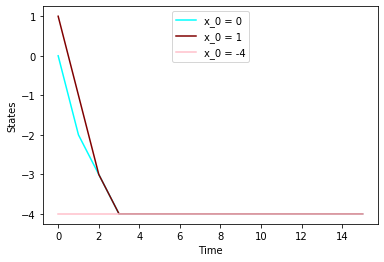

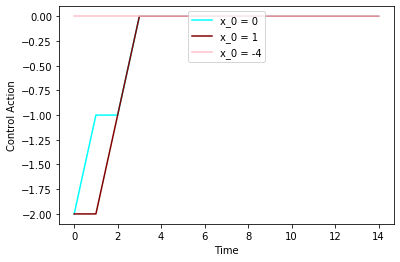

In [62]:
#plots
J,MU = Optimalfunction3()
t = np.arange(0,16)
plt.figure(1)
plt.xlabel("Time")
plt.ylabel("States")
plt.plot(t, optimalpath(0,MU)[0], 'aqua',label = "x_0 = 0")
plt.plot(t, optimalpath(1,MU)[0], 'maroon',label = "x_0 = 1")
plt.plot(t, optimalpath(-4,MU)[0], 'pink',label = "x_0 = -4")
plt.legend(loc="upper center")
t = np.arange(0,15)
plt.figure(2)
plt.xlabel("Time")
plt.ylabel("Control Action")
plt.plot(t, optimalpath(0,MU)[1], 'aqua',label = "x_0 = 0")
plt.plot(t, optimalpath(1,MU)[1], 'maroon',label = "x_0 = 1")
plt.plot(t, optimalpath(-4,MU)[1], 'pink',label = "x_0 = -4")
plt.legend(loc="upper center")

print("Optimal cost for x_0 = 0: ", J[-1][4])
print("Optimal cost for x_0 = 1: ", J[-1][5])
print("Optimal cost for x_0 = -4: ", J[-1][0])

# (e) DP when all the terminal costs are 0, and control action not penalized

In [64]:
def Optimalfunction2():
    J = []
    MU = []

    for i in range(0,16):
        V=[]
        mu=[]
        if(i == 0):
            #cost equal to 0 for all terminal states
            for j in range(0,S.size):
                V.append(0)
        else:
            for j in range(0,S.size):
                ji = float('inf')
                c = -4
                for k in range(0,U.size):
                    xn = S[j]+U[k]
                    if(xn<5 and xn>-5):
                        j1 = J[-1][xn+4]+(S[j]+4)*(S[j]+4)
                        if(j1<ji):
                            c = U[k]
                            ji = j1
                V.append(ji)
                mu.append(c)
        J.append(V)
        if(i!=0):
            MU.append(mu)
    return J,MU

In [65]:
J,MU = Optimalfunction2()
print("the minimum cost for x:" ,min(J[-1]))
print("set of control actions for stage 0: ", MU[-1])

the minimum cost for x: 0
set of control actions for stage 0:  [0, -1, -2, -2, -2, -2, -2, -2, -2]


### Plot when all terminal cost = 0, and control action not penalized

Optimal cost for x_0 = 0:  20
Optimal cost for x_0 = 1:  35
Optimal cost for x_0 = -4:  0


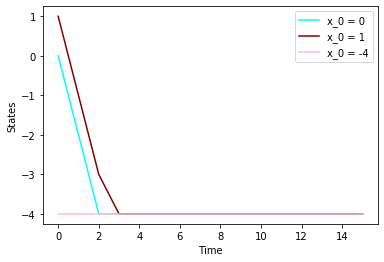

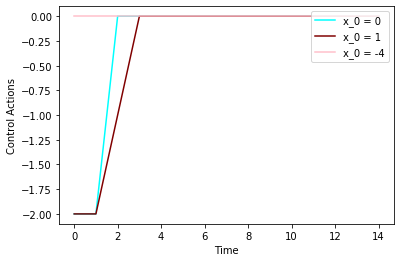

In [66]:
J1,MU1 = Optimalfunction2()
#print(min(J1[-1]))
#print(J[15-4][4+4])
t = np.arange(0,16)
plt.figure(1)
plt.xlabel("Time")
plt.ylabel("States")
plt.plot(t, optimalpath(0,MU1)[0], 'aqua',label = "x_0 = 0")
plt.plot(t, optimalpath(1,MU1)[0], 'maroon',label = "x_0 = 1")
plt.plot(t, optimalpath(-4,MU1)[0], 'pink',label = "x_0 = -4")
plt.legend(loc="upper right")
t = np.arange(0,15)
plt.figure(2)
plt.xlabel("Time")
plt.ylabel("Control Actions")
plt.plot(t, optimalpath(0,MU1)[1], 'aqua',label = "x_0 = 0")
plt.plot(t, optimalpath(1,MU1)[1], 'maroon',label = "x_0 = 1")
plt.plot(t, optimalpath(-4,MU1)[1], 'pink',label = "x_0 = -4")
plt.legend(loc="upper right")

print("Optimal cost for x_0 = 0: ", J[-1][4])
print("Optimal cost for x_0 = 1: ", J[-1][5])
print("Optimal cost for x_0 = -4: ", J[-1][0])

As compared to previous cost function, the control input is not being penalized this time.

Now the optimal costs are even lesser than both of the previous cases and this is happening because now we have freedom of converging the cost function aggresively due to absence of penalty on control input. 

For the state sequence we are trying to bring it to -4 (using admissible control action) as soon as possible because in that case our cost is becoming 0 for that stage.

For the control sequence, we have freedom to adopt any admissible value without being penalized, hence our goal is just to bring the cost down by pushing the state value to become -4, which in turn reduces cost to zero.